#Evaluation of Models

* Method 1: Test using the same training data
* Method 2: Test Train Split

# Method 1: Test using the same training data

** Logistic Regression **


In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [4]:
from sklearn.linear_model import LogisticRegression

In [8]:
logreg = LogisticRegression()
logreg.fit(X,y)
logreg.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
y_pred = logreg.predict(X)

In [12]:
from sklearn import metrics
print metrics.accuracy_score(y,y_pred)

0.96


** KNN, K = 1 **

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)
y_pred = knn.predict(X)
print metrics.accuracy_score(y,y_pred)

1.0


** KNN, K = 5 **

In [16]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)
y_pred = knn.predict(X)
print metrics.accuracy_score(y,y_pred)

0.966666666667


** Overfitting => Learning Noise **

# Method 2: Test train split

In [22]:
print X.shape
print y.shape

(150, 4)
(150,)


In [25]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=4)

In [27]:
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(90, 4)
(60, 4)
(90,)
(60,)


** Logistic Regsression **

In [30]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [33]:
y_pred = logreg.predict(X_test)
print metrics.accuracy_score(y_test,y_pred)

0.95


** KNN, K = 1 **

In [34]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print metrics.accuracy_score(y_test,y_pred)

0.95


** KNN, K = 5 **

In [41]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print metrics.accuracy_score(y_test,y_pred)

0.966666666667


In [50]:
k_range = range(1,50)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))

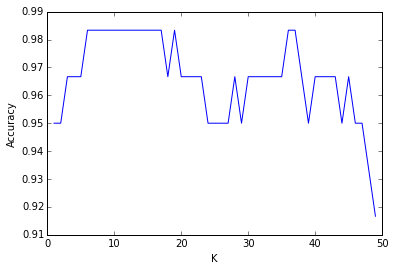

In [51]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(k_range,scores)
plt.xlabel('K')
plt.ylabel('Accuracy')

* **Training accuracy** rises as model complexity increases
* **Testing accuracy** penalizes models that are too complex or not complex enough
* For KNN complexity is determined by **K** lower value => Higher complexity

** For testing out of sample data, retrain the model using all the training observations **


In [57]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X,y)
knn.predict([3,5,4,2])

array([1])

# Drawbacks
    * High Variance estimate 